In [ ]:
!pip install scikit-fuzzy -qq

Question 1: Fuzzy Assessment of Student Performance
Student Performance Output: 8.31


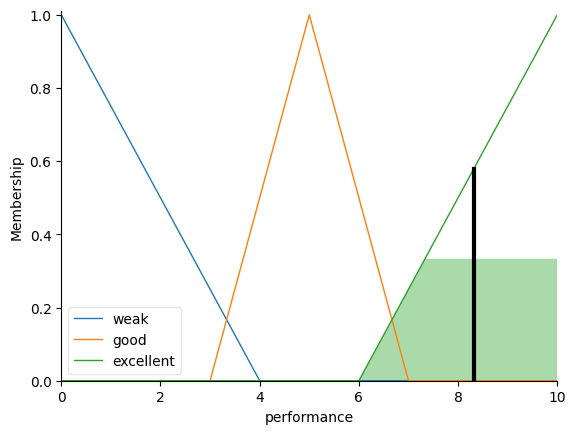

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

print("Question 1: Fuzzy Assessment of Student Performance")

# 1. Define Antecedents (inputs) and Consequent (output)
test_score = ctrl.Antecedent(np.arange(0, 101, 1), 'test_score')        # 0 to 100%
participation = ctrl.Antecedent(np.arange(0, 11, 1), 'participation')   # 0 to 10 scale
performance = ctrl.Consequent(np.arange(0, 11, 1), 'performance')       # 0 to 10 scale

# 2. Membership functions for test_score
test_score['low'] = fuzz.trapmf(test_score.universe, [-10, 0, 30, 50])
test_score['average'] = fuzz.trimf(test_score.universe, [40, 60, 80])
test_score['high'] = fuzz.trapmf(test_score.universe, [70, 85, 100, 110])

# 3. Membership functions for participation
participation['poor'] = fuzz.trapmf(participation.universe, [-1, 0, 2, 4])
participation['fair'] = fuzz.trimf(participation.universe, [3, 5, 7])
participation['active'] = fuzz.trapmf(participation.universe, [6, 8, 10, 11])

# 4. Membership functions for performance
performance['weak'] = fuzz.trimf(performance.universe, [0, 0, 4])
performance['good'] = fuzz.trimf(performance.universe, [3, 5, 7])
performance['excellent'] = fuzz.trimf(performance.universe, [6, 10, 10])

# 5. Define fuzzy rules
rule1 = ctrl.Rule(test_score['high'] & participation['active'], performance['excellent'])
rule2 = ctrl.Rule(test_score['average'] & participation['fair'], performance['good'])
rule3 = ctrl.Rule(test_score['low'] & participation['poor'], performance['weak'])

# 6. Create control system and simulation
perf_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
perf_sim = ctrl.ControlSystemSimulation(perf_ctrl)

# 7. Input values
perf_sim.input['test_score'] = 75
perf_sim.input['participation'] = 8

# 8. Compute result
perf_sim.compute()

# 9. Show output
print(f"Student Performance Output: {perf_sim.output['performance']:.2f}")
performance.view(sim=perf_sim)


Question 2: Fuzzy Classification of Driving Risk
Driving Risk Output: 8.44


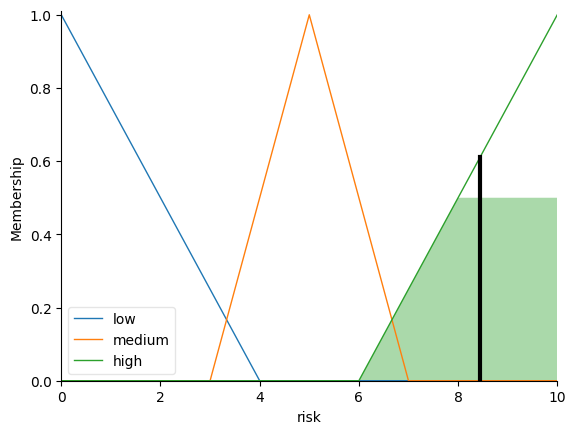

In [ ]:
print("Question 2: Fuzzy Classification of Driving Risk")
# 1. Define Antecedents (inputs) and Consequent (output)
speed = ctrl.Antecedent(np.arange(0, 151, 1), 'speed')               # 0 to 150 km/h
traffic = ctrl.Antecedent(np.arange(0, 51, 1), 'traffic')            # 0 to 50 cars/km
risk = ctrl.Consequent(np.arange(0, 11, 1), 'risk')                  # 0 to 10 scale

# 2. Membership functions for speed
speed['slow'] = fuzz.trapmf(speed.universe, [-10, 0, 30, 60])
speed['moderate'] = fuzz.trimf(speed.universe, [50, 80, 110])
speed['fast'] = fuzz.trapmf(speed.universe, [100, 120, 150, 160])

# 3. Membership functions for traffic
traffic['low'] = fuzz.trapmf(traffic.universe, [-5, 0, 10, 20])
traffic['medium'] = fuzz.trimf(traffic.universe, [15, 25, 35])
traffic['high'] = fuzz.trapmf(traffic.universe, [30, 40, 50, 60])

# 4. Membership functions for risk
risk['low'] = fuzz.trimf(risk.universe, [0, 0, 4])
risk['medium'] = fuzz.trimf(risk.universe, [3, 5, 7])
risk['high'] = fuzz.trimf(risk.universe, [6, 10, 10])

# 5. Define fuzzy rules
rule1 = ctrl.Rule(speed['fast'] & traffic['high'], risk['high'])
rule2 = ctrl.Rule(speed['moderate'] & traffic['low'], risk['medium'])
rule3 = ctrl.Rule(speed['slow'] & traffic['low'], risk['low'])

# 6. Create control system and simulation
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
risk_sim = ctrl.ControlSystemSimulation(risk_ctrl)

# 7. Input values
risk_sim.input['speed'] = 120
risk_sim.input['traffic'] = 35

# 8. Compute result
risk_sim.compute()

# 9. Show output
print(f"Driving Risk Output: {risk_sim.output['risk']:.2f}")
risk.view(sim=risk_sim)
